In [44]:
using GraphPlot, LightGraphs, LightGraphs.SimpleGraphs, SimpleWeightedGraphs, Plots, ProgressMeter, LinearAlgebra, Distributions

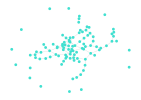

In [10]:
n=100
g=SimpleGraph(n);
for i in 1:100
    add_edge!(g, rand(1:n), rand(1:n));
end
gplot(g)

In [2]:
n=1000
ensemble=[]
@showprogress for k in 1:100
    smc = [] # size of maximally connected graph as vertices are added 
    g = SimpleGraph(n);
    for i in 1:2000
        add_edge!(g, rand(1:n), rand(1:n));
        ccs = connected_components(g)
        sccs = map(x->length(x), ccs)
        push!(smc, maximum(sccs))
    end
    push!(ensemble, smc)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:24


In [ ]:
plot(ensemble, alpha=0.1, leg=:none)
vline!([n>>1], lw=3)

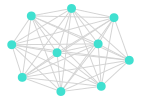

In [54]:
function complete_random_graph(n=10)
    g = SimpleWeightedGraph(n)
    for i in 1:n
        for j in 1:n
            if i!=j
                add_edge!(g,i,j,rand(Exponential(0.2)))
            end
        end
    end
    g
end
gplot(Graph(adjacency_matrix(complete_random_graph(10))))

In [55]:
n=20
t=20
ensemble = []
@showprogress for i in 1:200
    p=[]
    for alpha in 0:(10/100):10
        smc = [] # maximum eigenvalues
        for k in 1:t
            g = complete_random_graph(n)
            push!(smc, maximum(eigvals(Matrix(weights(g)))))
        end
        push!(p, count(λmax -> λmax<alpha, smc)/t)
    end
    push!(ensemble, p)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:47


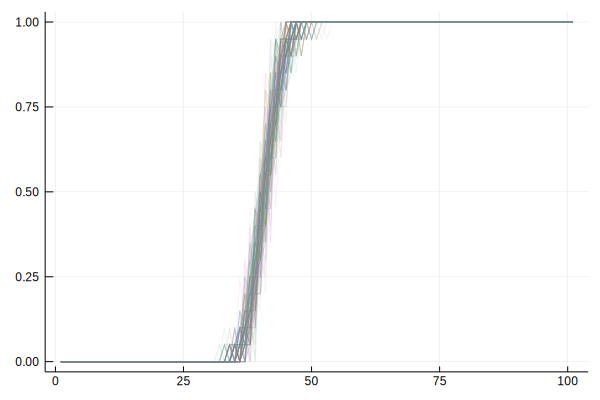

In [56]:
plot(ensemble, alpha=0.1, leg=:none)

In [14]:
n=20
t=20
ensemble = []
@showprogress for i in 1:200
    p=[]
    for alpha in 0:0.1:10
        smc = [] # maximum eigenvalues
        for k in 1:t
            A = randn(n,n)
            #A = (A'+A)/2
            #for i in 1:n A[i,i]=0 end
            push!(smc, maximum(real(eigvals(A))))
        end
        push!(p, count(λmax -> λmax<alpha, smc)/t)
    end
    push!(ensemble, p)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:35


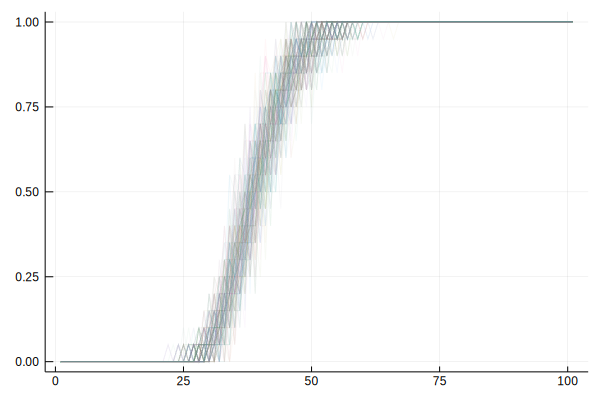

In [15]:
plot(ensemble, alpha=0.05, leg=:none)